In [1]:
import os
import cv2
import numpy as np
from imutils import paths
import pickle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.optimizers.legacy import SGD
from keras.layers import BatchNormalization


In [2]:
dataPath = r"/Users/priyankafrancis/Desktop/Dissertation/data"
outputmodel = r"/Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification"
outputlabelbinarizer = r"/Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videocnn1"
epoch = 50
video_Labels = set(['snow','sunny','raining','football','badminton','baseball','basketball','boxing','chess','cricket','fencing','football','formula1','gymnastics','hockey','ice_hockey','kabaddi','motogp','shooting','swimming','table_tennis','tennis','volleyball','weight_lifting','wrestling','wwe'])
print("Images are being loaded ....")
pathToImages = list(paths.list_images(dataPath))
data = []
labels = []



Images are being loaded ....


In [3]:
# PreProcessing of Data

# PreProcessing of Data
for images in pathToImages:
    label = images.split(os.path.sep)[-2]
    if label not in video_Labels:
        continue
    image = cv2.imread(images)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 224))  # Change resize dimensions here
    data.append(image)
    labels.append(label)

    
 
    
    
# Converting data and labels to numpy arrays for model training
data = np.array(data)
labels = np.array(labels)



libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 'GRAY':

In [4]:
# Hot Encoded Values as 0, 1, 2, 3, 4, 5, 6
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
# Train-test data split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)
# Augmentation
trainingAugmentation = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [6]:
# Validation Augmentation
validationAugmentation = ImageDataGenerator()

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(224, 244, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(lb.classes_), activation='softmax'))

In [7]:
opt = SGD(lr=0.0001, momentum=0.9, decay=1e-4 / epoch)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



/Users/priyankafrancis/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
batch_size = 32
steps_per_epoch = len(X_train) // batch_size
History = model.fit_generator(
    trainingAugmentation.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=steps_per_epoch,
    validation_data=validationAugmentation.flow(X_test, Y_test),
    validation_steps=len(X_test) // 32,
    epochs=epoch
)



/var/folders/br/m_cg9hx50713f33ph31t6xxc0000gn/T/ipykernel_33964/3515364376.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(


Epoch 1/50
339/339 [==============================] - 789s 2s/step - loss: 3.0339 - accuracy: 0.2007 - val_loss: 2.4671 - val_accuracy: 0.2837
Epoch 2/50
339/339 [==============================] - 762s 2s/step - loss: 2.5585 - accuracy: 0.2662 - val_loss: 2.3404 - val_accuracy: 0.3385
Epoch 3/50
339/339 [==============================] - 780s 2s/step - loss: 2.4273 - accuracy: 0.3020 - val_loss: 2.1600 - val_accuracy: 0.3662
Epoch 4/50
339/339 [==============================] - 781s 2s/step - loss: 2.3324 - accuracy: 0.3209 - val_loss: 2.0302 - val_accuracy: 0.4096
Epoch 5/50
339/339 [==============================] - 791s 2s/step - loss: 2.2339 - accuracy: 0.3520 - val_loss: 1.9633 - val_accuracy: 0.4342
Epoch 6/50
339/339 [==============================] - 784s 2s/step - loss: 2.2020 - accuracy: 0.3585 - val_loss: 2.0684 - val_accuracy: 0.4143
Epoch 7/50
339/339 [==============================] - 780s 2s/step - loss: 2.1431 - accuracy: 0.3782 - val_loss: 1.8817 - val_accuracy: 0.4555

In [9]:
model.save(outputmodel)
lbinarizer=open(r"/Users/priyankafrancis/Desktop/Dissertation/output/videocnn1.pickle","wb")
lbinarizer.write(pickle.dumps(lb))
lbinarizer.close()

INFO:tensorflow:Assets written to: /Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification/assets


INFO:tensorflow:Assets written to: /Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification/assets


In [10]:
# After training
print("Training accuracy:", History.history['accuracy'][-1])
print("Validation accuracy:", History.history['val_accuracy'][-1])

Training accuracy: 0.5539029836654663
Validation accuracy: 0.5945796370506287


In [11]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Evaluate the model
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test_classes, Y_pred_classes)
recall = recall_score(Y_test_classes, Y_pred_classes, average='weighted')
f1 = f1_score(Y_test_classes, Y_pred_classes, average='weighted')
precision = precision_score(Y_test_classes, Y_pred_classes, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)


114/114 [==============================] - 61s 527ms/step
Accuracy: 0.5950276243093923
Recall: 0.5950276243093923
F1 Score: 0.5847056994189425
Precision: 0.596176572748832


114/114 [==============================] - 60s 525ms/step


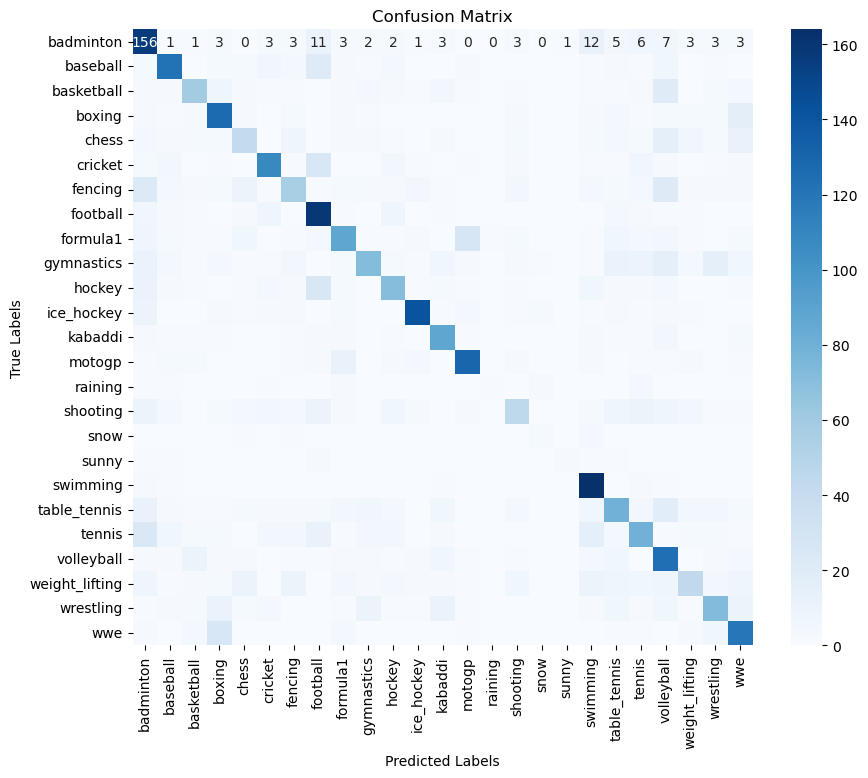

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


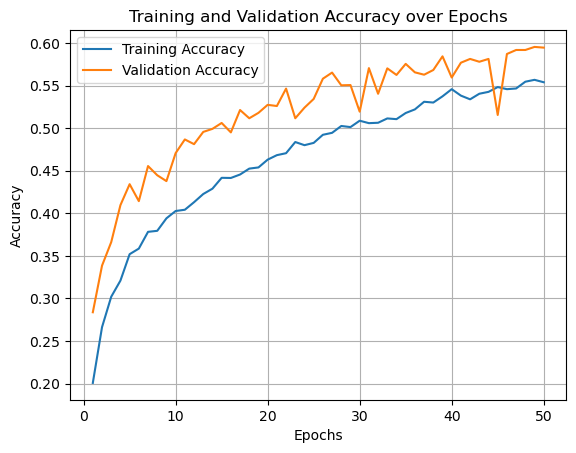

In [13]:
# Extract accuracy values
training_accuracy = History.history['accuracy']
validation_accuracy = History.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Create a line plot
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()